# Exploratory Data Analysis on Bus Stations
dataset contains bus station names and attrction names around the station with distnces from the station to the attrction in meters

In [1]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%matplotlib inline
%pip install geopy
%pip install folium

In [1]:
import pandas as pd

file_path = '/content/MadridBus_structured_data.csv'
data = pd.read_csv(file_path)

print(data.head())

   private_line_number public_line_number  \
0                   17                 17   
1                   18                 18   
2                   23                 23   
3                   28                 28   
4                   31                 31   

                                route_Name  number_of_travelers_2021  \
0   PLAZA MAYOR - COLONIA PARQUE DE EUROPA                   3724626   
1           PLAZA MAYOR - VILLAVERDE CRUCE                   1286988   
2           PLAZA MAYOR - VILLAVERDE CRUCE                   3517989   
3  PUERTA DE ALCALA - BARRIO DE CANILLEJAS                   4260501   
4                     PLAZA MAYOR - ALUCHE                   4291638   

  attraction_by_bus  distance(m)  jan avg day  jan avg night  \
0       Plaza Mayor           17            6              5   
1       Plaza Mayor          280            6              5   
2       Plaza Mayor          350            6              5   
3  Puerta de Alcalá          120        

In [2]:
missing = data.isnull().sum()*100 / len(data)
print(missing)

private_line_number           0.0
public_line_number            0.0
route_Name                    0.0
number_of_travelers_2021      0.0
attraction_by_bus             0.0
distance(m)                   0.0
jan avg day                   0.0
jan avg night                 0.0
february avg day              0.0
february avg night            0.0
march avg day                 0.0
march avg night               0.0
april avg day                 0.0
april avg night               0.0
may avg day                   0.0
may avg night                 0.0
june avg day                  0.0
june avg night                0.0
july avg day                  0.0
july avg night                0.0
august avg day                0.0
august avg night              0.0
september avg day             0.0
september avg night           0.0
october avg day               0.0
october avg night             0.0
november avg day              0.0
november avg night            0.0
decmber avg day               0.0
decmber avg ni

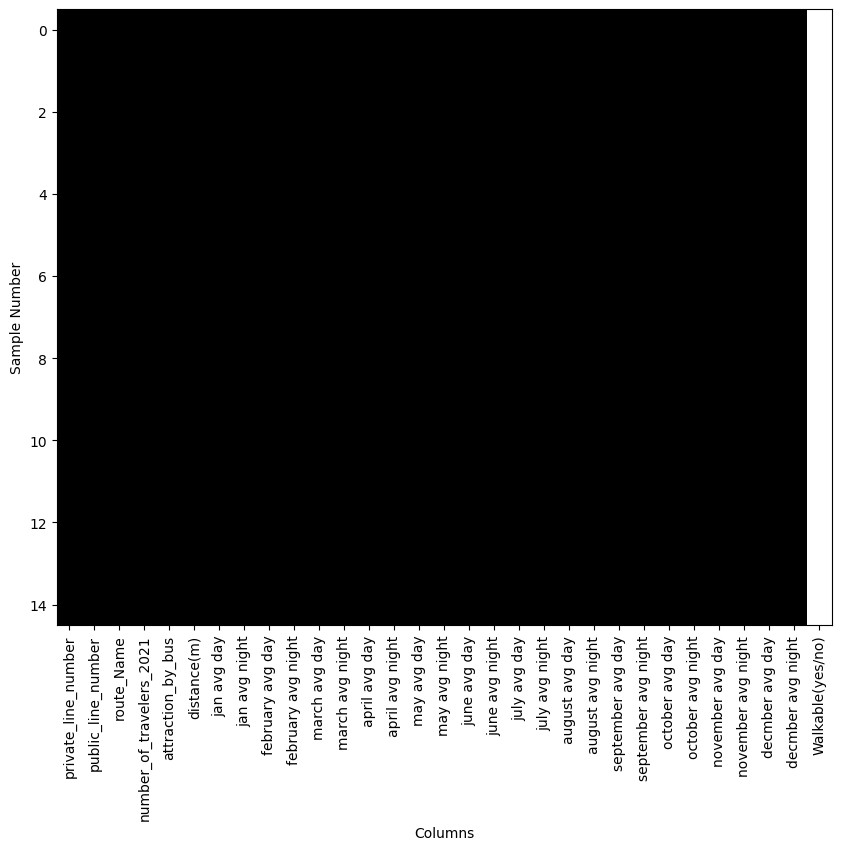

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")

# Set the x-tick labels to the column names
plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=90)

# Labeling the axes
plt.xlabel("Columns")
plt.ylabel("Sample Number")

# Display the plot
plt.show()


only the Walkable(yes/no)
coulumn is empty as we still didnt compute the values

# adding walkbility coulumn

This code evaluates the walkability of attractions near metro stations based on specific criteria: the distance to the attraction (≤2000m), walking duration (≤25 minutes), and average temperature (<30°C). It calculates the average temperature across monthly data for each station, applies a function to assess whether the attraction is walkable, and stores the result in a new column . Finally, it displays relevant columns to summarize the evaluation. The goal is to analyze urban accessibility and walking feasibility under practical conditions.

In [4]:
# Calculate the average temperature across all monthly columns
monthly_columns = [col for col in data.columns if 'morning' in col or 'night' in col]
data['Avg_Temperature'] = data[monthly_columns].mean(axis=1)

# Define a function to evaluate walkability
def evaluate_walkability(row):
  if row['distance(m)'] <= 2000:  # Main criterion
    if row['Avg_Temperature'] < 30:
      return 'Yes'
  return 'No'

# Apply the criteria specifically to the Walkable(yes/no) column
data['Walkable(yes/no)'] = data.apply(evaluate_walkability, axis=1)

# Display the updated DataFrame with the modified Walkable(yes/no) column
data[['route_Name', 'distance(m)', 'Avg_Temperature', 'Walkable(yes/no)']]

,route_Name,distance(m),Avg_Temperature,Walkable(yes/no)
0,PLAZA MAYOR - COLONIA PARQUE DE EUROPA,17,14.916667,Yes
1,PLAZA MAYOR - VILLAVERDE CRUCE,280,14.916667,Yes
2,PLAZA MAYOR - VILLAVERDE CRUCE,350,14.916667,Yes
3,PUERTA DE ALCALA - BARRIO DE CANILLEJAS,120,14.916667,Yes
4,PLAZA MAYOR - ALUCHE,110,14.916667,Yes
5,TRIBUNAL - ALFONSO XIII,120,14.916667,Yes
6,PLAZA MAYOR - AVENIDA DEL MANZANARES,240,14.916667,Yes
7,PLAZA DEL CALLAO - COLONIA MANZANARES,110,14.916667,Yes
8,AVENIDA DE AMERICA - BARRIO DEL AEROPUERTO,600,14.916667,Yes
9,TRIBUNAL - PLAZA DE CASTILLA,120,14.916667,Yes



Walkability Analysis Results:
                  Walkable(yes/no)
Walkable(yes/no)                  
Yes                             15


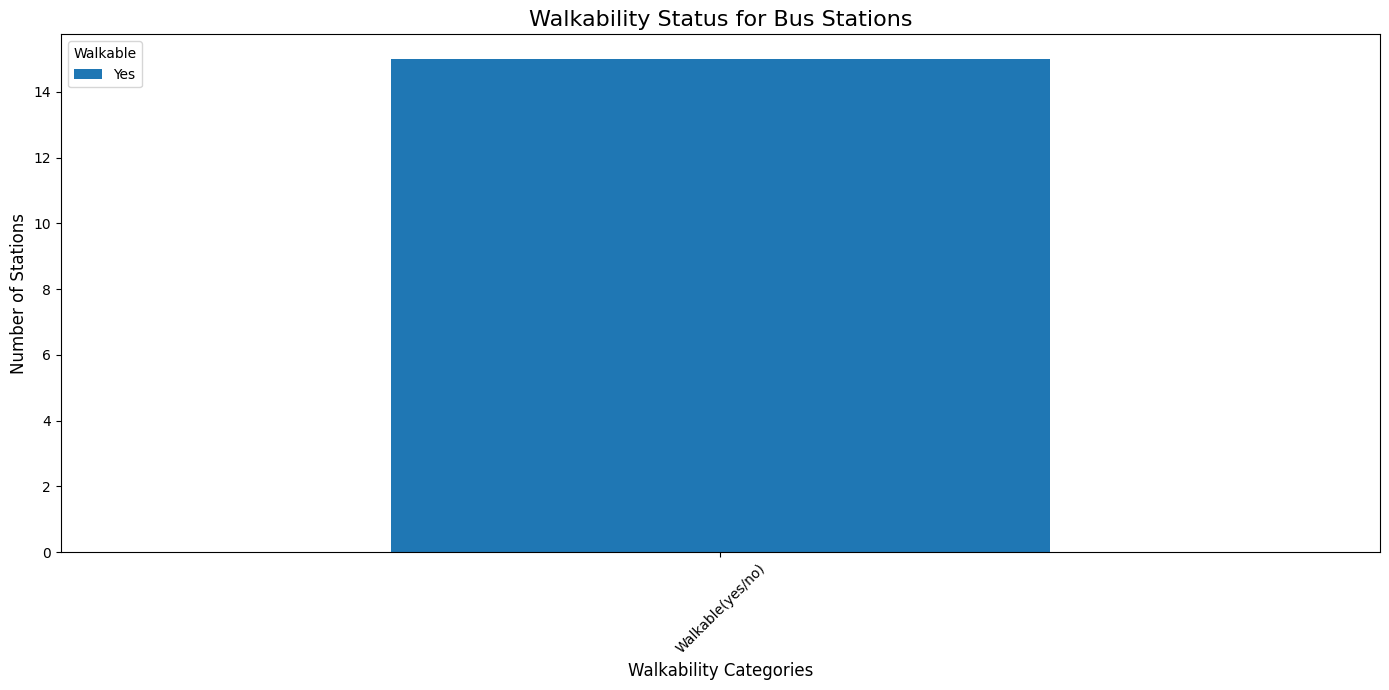

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is already loaded and walkability column is defined

# Define walkability columns
walkability_columns = [
"Walkable(yes/no)"
]

# Calculate the value counts for each walkability column
walkability_df = data[walkability_columns].apply(lambda x: x.value_counts())

# Print the value counts for better visualization
print("\nWalkability Analysis Results:")
print(walkability_df)

# Plotting the value counts for each walkability category
walkability_df.T.plot(kind='bar', figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])

# Adding titles and labels
plt.title('Walkability Status for Bus Stations', fontsize=16)
plt.ylabel('Number of Stations', fontsize=12)
plt.xlabel('Walkability Categories', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Walkable', loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The dataset suggests that all bus stations analyzed are walkable. There are no stations categorized as "Not Walkable (No)."

# plottig traffic on stations on map

In [10]:
import pandas as pd
import folium
import matplotlib.colors as mcolors

# Sample metro data (using your provided dataset structure)
data = pd.DataFrame({
    'StationName': [
        'PLAZA MAYOR - COLONIA PARQUE DE EUROPA', 'PLAZA MAYOR - VILLAVERDE CRUCE',
        'PLAZA MAYOR - VILLAVERDE CRUCE', 'PUERTA DE ALCALA - BARRIO DE CANILLEJAS',
        'PLAZA MAYOR - ALUCHE', 'TRIBUNAL - ALFONSO XIII', 'PLAZA MAYOR - AVENIDA DEL MANZANARES',
        'PLAZA DEL CALLAO - COLONIA MANZANARES', 'AVENIDA DE AMERICA - BARRIO DEL AEROPUERTO',
        'TRIBUNAL - PLAZA DE CASTILLA', 'ESTACION DE ATOCHA - MONCLOA', 'PLAZA ELIPTICA - CEMENTERIO SUR',
        'ALAMEDA DE OSUNA - CANILLEJAS', 'ATOCHA RENFE - RECOLETOS', 'ALAMEDA DE OSUNA - TORRE ARIAS'
    ],
    'Latitude': [
        40.416, 40.417, 40.423, 40.418, 40.420, 40.426, 40.435, 40.435, 40.441,
        40.439, 40.407, 40.408, 40.431, 40.409, 40.415
    ],
    'Longitude': [
        -3.701, -3.693, -3.690, -3.692, -3.710, -3.705, -3.705, -3.710, -3.691,
        -3.685, -3.693, -3.694, -3.703, -3.703, -3.710
    ],
    'number_of_travelers_2021': [
        3724626, 1286988, 3517989, 4260501, 4291638, 1113780, 678411, 793780, 1103173,
        1039456, 1793357, 23861, 0, 0, 0
    ]
})

# Normalize the number_of_travelers_2021 to create the color intensity scale
traffic_max = data['number_of_travelers_2021'].max()  # Max traffic value
traffic_min = data['number_of_travelers_2021'].min()  # Min traffic value

# Function to determine color intensity based on traffic (monochromatic red scale)
def get_color_by_traffic(traffic):
    # Normalize the traffic to a range between 0 and 1
    normalized_traffic = (traffic - traffic_min) / (traffic_max - traffic_min)

    # Generate red color intensity based on normalized traffic value
    r = int(255 * normalized_traffic)  # Red component (light to dark)
    g = 0  # No green component for a red scale
    b = 0  # No blue component for a red scale

    return f'#{r:02x}{g:02x}{b:02x}'  # Return hex color

# Step 1: Create a folium map
m = folium.Map(location=[40.4167, -3.70325], zoom_start=12)  # Centered in Madrid

# Step 2: Add all stations as CircleMarkers with color intensity based on number_of_travelers_2021
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,  # Adjust marker size
        popup=f"{row['StationName']}<br>Travelers: {row['number_of_travelers_2021']:,}",
        color=get_color_by_traffic(row['number_of_travelers_2021']),
        fill=True,
        fill_color=get_color_by_traffic(row['number_of_travelers_2021']),
        fill_opacity=0.7
    ).add_to(m)

# Step 3: Display the map directly (for Jupyter, IPython, or interactive environments)
m


the legend :

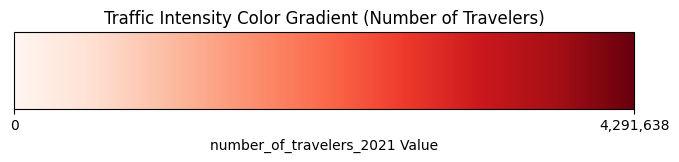

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Metro data
data = {
    'StationName': [
        'PLAZA MAYOR - COLONIA PARQUE DE EUROPA', 'PLAZA MAYOR - VILLAVERDE CRUCE',
        'PLAZA MAYOR - VILLAVERDE CRUCE', 'PUERTA DE ALCALA - BARRIO DE CANILLEJAS',
        'PLAZA MAYOR - ALUCHE', 'TRIBUNAL - ALFONSO XIII', 'PLAZA MAYOR - AVENIDA DEL MANZANARES',
        'PLAZA DEL CALLAO - COLONIA MANZANARES', 'AVENIDA DE AMERICA - BARRIO DEL AEROPUERTO',
        'TRIBUNAL - PLAZA DE CASTILLA', 'ESTACION DE ATOCHA - MONCLOA', 'PLAZA ELIPTICA - CEMENTERIO SUR',
        'ALAMEDA DE OSUNA - CANILLEJAS', 'ATOCHA RENFE - RECOLETOS', 'ALAMEDA DE OSUNA - TORRE ARIAS'
    ],
    'number_of_travelers_2021': [
        3724626, 1286988, 3517989, 4260501, 4291638, 1113780, 678411, 793780, 1103173,
        1039456, 1793357, 23861, 0, 0, 0
    ]
}

# Step 1: Normalize number_of_travelers_2021 to create the color gradient
traffic_min = min(data['number_of_travelers_2021'])
traffic_max = max(data['number_of_travelers_2021'])

# Normalize traffic data
norm = mcolors.Normalize(vmin=traffic_min, vmax=traffic_max)

# Create a red color gradient using the normalized traffic values
cmap = plt.cm.Reds

# Step 2: Create a color gradient
fig, ax = plt.subplots(figsize=(8, 1))
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=ax, orientation='horizontal')

# Step 3: Set the title and labels
cbar.set_label('number_of_travelers_2021 Value')
cbar.set_ticks([traffic_min, traffic_max])  # Min and Max traffic values
cbar.set_ticklabels([f'{traffic_min:,}', f'{traffic_max:,}'])  # Format the tick labels

# Step 4: Show the color gradient
plt.title("Traffic Intensity Color Gradient (Number of Travelers)")
plt.show()


# Map Interpretation

The color of the marker indicates the number of travelers using that station in 2021.

Dark Red: Stations with a high number of travelers.

Light Red: Stations with fewer travelers.

Stations with no data or zero travelers might not appear prominently on the map.
Marker Size: The size remains consistent, allowing the color intensity to visually indicate traffic levels.
# Color Gradient (Traffic Intensity Scale)
The gradient ranges from light red to dark red:

Light Red: Represents stations with lower traffic.

Dark Red: Represents stations with higher traffic.

The normalization of traffic data ensures a smooth gradient, where the maximum value (4,291,638 travelers) corresponds to the darkest shade of red and the minimum value (0 travelers) corresponds to the lightest shade.
# General Findings from the Visuals
**Station Distribution:**
Stations are concentrated in the city center, reflecting the dense urban transport network of Madrid.

**High-Traffic Stations:**
Stations such as "PLAZA MAYOR - ALUCHE" and "PUERTA DE ALCALA - BARRIO DE CANILLEJAS" have dark red markers, indicating they were heavily used by travelers in 2021.

**Low-Traffic Stations:**
Stations like "ALAMEDA DE OSUNA - CANILLEJAS" and "ALAMEDA DE OSUNA - TORRE ARIAS" have no or very light red markers, reflecting limited or no traffic.

# Practical Insights
The visualization helps identify key transport hubs and stations with significant commuter traffic.
Planners could use this data to allocate resources or identify areas requiring better infrastructure.
The stations with negligible traffic (if operational) may need evaluation for optimization or better connectivity.

*what station is closer to my attrction? the metro or the bus ?* **this question has been answerd in MadridMetro_EDA.ipynb......**